# Hypothesis Testing in Python
Run the hidden code cell below to import the data used in this course.

In [1]:
# Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

# Import the course datasets 
republican_votes = pd.read_feather('datasets/repub_votes_potus_08_12.feather')
democrat_votes = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
shipments = pd.read_feather('datasets/late_shipments.feather')
stackoverflow = pd.read_feather("datasets/stack_overflow.feather")

# Chapter 2

In [2]:
shipments

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,HETERO LABS LIMITED,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,60.0,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60.0,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",Generic,N/A,Test kit - Ancillary,100.0,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13608.0,Uganda,PMO - US,Direct Drop,DDP,Air,0.0,No,ARV,Adult,ASPEN PHARMACARE,"Etravirine 100mg [Intelence], tablets, 120 Tabs",Etravirine,Intelence,100mg,Tablet,120.0,121.0,9075.00,75.00,0.62,"Janssen-Cilag, Latina, IT",Yes,43.0,199.00,reasonable,12.72
996,80394.0,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,292.0,9344.00,32.00,1.60,"Trinity Biotech, Plc",Yes,99.0,2162.55,reasonable,13.10
997,61675.0,Zambia,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2127.0,170160.00,80.00,0.80,"Alere Medical Co., Ltd.",Yes,881.0,14019.38,expensive,210.49
998,39182.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30.0,191011.0,861459.61,4.51,0.15,"Aurobindo Unit III, India",Yes,16234.0,14439.17,expensive,1421.41


In [19]:
# Calculating the mean statistic of each of the two samples
xbar_no=shipments[shipments['late']=='No']['weight_kilograms'].mean()
xbar_yes=shipments[shipments['late']=='Yes']['weight_kilograms'].mean()

# Calculating the standard deviation of each of the two samples
s_no=np.std(shipments[shipments['late']=='No']['weight_kilograms'])
s_yes=np.std(shipments[shipments['late']=='Yes']['weight_kilograms'])

# Caclulating the sample sizes
n_no=shipments[shipments['late']=='No'].count()
n_yes=shipments[shipments['late']=='Yes'].count()

## Two sample mean test statistic

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

The hypotheses:

**Ho:** The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

**Ha:** The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

T-statistic= (observed value - hypothesised value) / standard error

In [ ]:
# Calculate the numerator of the test statistic - observed value - hypothesised value
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic - standard error
denominator = np.sqrt(s_no**2/n_no + s_yes**2/n_yes)

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print(t_stat)

In [18]:
s_no

3152.3595924472406

When testing for differences between means, the test statistic is called 't' rather than 'z', and can be calculated using six numbers from the samples.

Why is t needed?

The process for calculating p-values is to start with the sample statistic, standardize it to get a test statistic, then transform it via a cumulative distribution function. 
In Chapter 1, that final transformation was denoted **z**, and the CDF transformation used the (standard normal) z-distribution. In the last video, the test statistic was denoted **t**, and the transformation used the t-distribution.

**T-test is used When a sample standard deviation is used in estimating a standard error.**

In [20]:
alpha=0.05

In [ ]:
from scipy.stats import t

# Calculate the degrees of freedom
degrees_of_freedom = n_yes + n_no -2

# Calculate the p-value from the test stat - we have left-tailed so we just use t.cdf not 1-t.cdf
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

p<=alpha so we reject the null hypothesis

## Paired t-tests

Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

In [21]:
democrat_votes

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546
...,...,...,...,...
495,Wyoming,Uinta,19.065464,14.191263
496,Wyoming,Washakie,20.131846,13.948610
497,Alaska,District 3,33.514582,16.301064
498,Alaska,District 18,61.284271,52.810051


In [22]:
sample_dem_data=democrat_votes.copy()

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


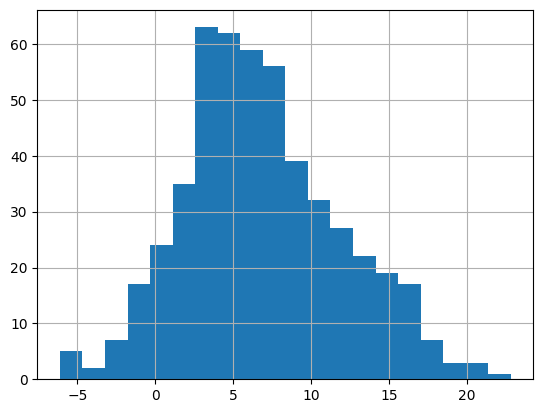

In [30]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12']-sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print sample_dem_data
print(sample_dem_data)

# Plot a histogram of diff with 20 bins
#plt.hist(sample_dem_data['diff'], bins=20)
sample_dem_data['diff'].hist(bins=20)
plt.show()

Using ttest()

Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

Ho: The proportion of democratic votes in 2012 and 2016 were the same. 
Ha: The proportion of democratic votes in 2012 and 2016 were different.

In [32]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], y=0, alternative="two-sided")
                              
# Print the test results
print(test_results)

                T  dof alternative  ...   cohen-d        BF10  power
T-test  30.298384  499   two-sided  ...  1.354985  2.246e+111    1.0

[1 rows x 8 columns]


p-value is ( ), a lot less than alpha (0.01) so we reject Null hypothesis

In [33]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'],
                                     paired=True,
                                     alternative="two-sided")

                              
# Print the paired test results
print(paired_test_results)

                T  dof alternative  ...   cohen-d        BF10  power
T-test  30.298384  499   two-sided  ...  0.454202  2.246e+111    1.0

[1 rows x 8 columns]


<script.py> output:
                 T  dof alternative       p-val         CI95%  cohen-d        BF10  power
    T-test  30.298  499   two-sided  3.601e-115  [6.39, 7.27]    0.454  2.246e+111    1.0

## ANOVA Tests

So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


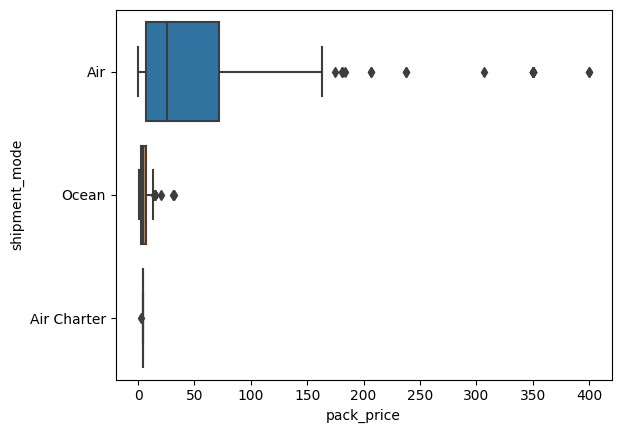

In [42]:
late_shipments=shipments.copy()

# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped means
print(xbar_pack_by_mode)

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(data=late_shipments, x='pack_price', y='shipment_mode')
plt.show()

Conducting an ANOVA test

The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

Ho: Pack prices for every category of shipment mode are the same.

Ha: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

In [44]:
# Run an ANOVA for pack_price across shipment_mode
anova_results =pingouin.anova(data=late_shipments,
dv="pack_price",
between="shipment_mode")

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


the p-value of  5.089479e-10 is significantly lower than alpha 0.01 so we reject Null hypothesis

Pairwise t-tests

The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

In [51]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments,
                                  dv="pack_price",
                                  between="shipment_mode",
                                  padjust='bonf')

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  ...  p-adjust       BF10    hedges
0  shipment_mode          Air  Air Charter  ...      bonf  5.809e+76  0.726592
1  shipment_mode          Air        Ocean  ...      bonf  1.129e+67  0.711119
2  shipment_mode  Air Charter        Ocean  ...      bonf     15.277 -0.423775

[3 rows x 13 columns]


After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.

# Chapter 3

## Test for single proportions

In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.

In [55]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score - this is a right tailed test (greater than)
p_value = 1-norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


## Two-sample proportion search

Test of two proportions

You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

Ho: late expensive - late reasonable = 0

Ha: late expensive - late reasonable > 0

In [21]:
late_shipments=shipments.copy()

# p_hats contains the estimates of population proportions (sample proportions) for each freight_cost_group:

p_hats=late_shipments.groupby("freight_cost_groups")['late'].value_counts(normalize=True)
p_hats=p_hats.loc[p_hats.index.get_level_values('late') == 'Yes']
p_hats

# ns contains the sample sizes for these groups:

ns=late_shipments.groupby("freight_cost_groups")['late'].count()
ns

freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64

In [24]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score)

# Print p_value
print(p_value)

[0.00173534]


This tiny p-value leads us to suspect there is a larger proportion of late shipments for expensive freight compared to reasonable freight.

**proportions_ztest() for two samples**

That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the statsmodels package.

In [8]:
late_shipments=shipments.copy()

# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([45 + 500, 16 + 439])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n,
                                  alternative="larger")

# Print the results
print(stat, p_value)

3.1190401865206128 0.0009072060637051224


**Performing a chi-square test**

The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

EXW: "Ex works". The buyer pays for transportation of the goods.
CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
FCA: "Free carrier". The seller pays for transportation of the goods.
Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

Ho: vendor_inco_term and freight_cost_group are independent.

Ha: vendor_inco_term and freight_cost_group are associated

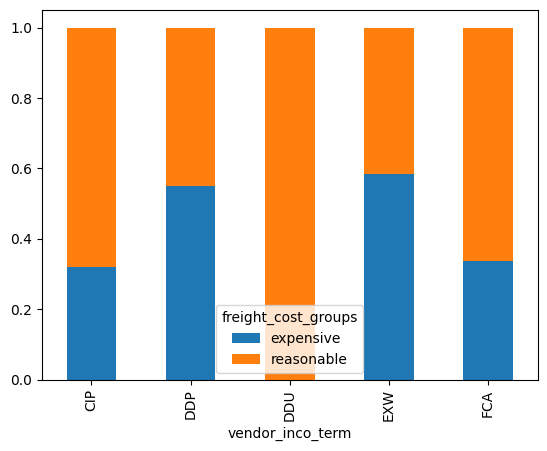

In [10]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

In [11]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x="freight_cost_groups", y="vendor_inco_term")

# Print results
print(stats[stats['test'] == 'pearson']) 

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


p-val (5.093922e-07) is < alpha (0.1)

**Chi-square goodness of fit tests**

Visualizing goodness of fit

The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

CIP: 0.05
DDP: 0.1
EXW: 0.75
FCA: 0.1

In [ ]:
# Find the number of rows in late_shipments
n_total = late_shipments.value_counts()

# Print n_total
print(n_total)

Performing a goodness of fit test

The bar plot of vendor_inco_term suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

Ho: The sample matches with the hypothesized distribution.

Ha: The sample does not match with the hypothesized distribution.

To decide which hypothesis to choose, we'll set a significance level of 0.1.

In [ ]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha=0.5, color="blue", label="Hypothesized")
plt.legend()
plt.show()

 The test to compare the proportions of a categorical variable to a hypothesized distribution is called a chi-square goodness of fit test.

# Chapter 4

**Testing sample size**

In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.

The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the late_shipments dataset.

In [3]:
# Large sample size: t-test - n must be 30

late_shipments=shipments.copy()

# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64
True


In [4]:
# Large Sample Size Proportion Tests - n must be 10

# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

No     939
Yes     61
Name: late, dtype: int64
True


In [6]:
# Chi Square independence test - n must be 5

# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
False


In [ ]:
# ANOVA - n must be 30

# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

**Wilcoxon signed-rank test**

You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

In [7]:
sample_dem_data=democrat_votes.copy()

In [8]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],
                                        y=sample_dem_data['dem_percent_16'],
                                        alternative="two-sided")

# Print paired t-test results
print(paired_test_results)

               T  dof alternative  ...   cohen-d       BF10  power
T-test  7.181565  998   two-sided  ...  0.454202  4.308e+09    1.0

[1 rows x 8 columns]


In [9]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'],
                                        y=sample_dem_data['dem_percent_16'],
                                        alternative="two-sided")

# Print Wilcoxon test results
print(wilcoxon_test_results)

           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816


**Wilcoxon-Mann-Whitney**

Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

In [12]:
late_shipments=shipments.copy()

# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms','late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')

# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'], y=weight_vs_late_wide['Yes'], alternative='two-sided')

# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


**Kruskal-Wallis**

Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.

Run a Kruskal-Wallis test on weight_kilograms between the different shipment modes in late_shipments.

In [13]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments,
                           dv='weight_kilograms',
                           between='shipment_mode')

# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28
